In [1]:
from pipeline import Pipeline
import numpy as np
import pandas as pd
import pandas as pd
from Models.LinearRegression import LinearRegressionModel
from Models.LassoRegression import LassoRegression
from Models.RidgeRegression import RidgeRegression
from Models.RandomForestRegressor import RandomForestReg
from pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


2024-03-20 05:22:30.699 | INFO     | preprocessing.abstract_prep:<module>:6 - Successfully imported file
2024-03-20 05:22:30.699 | INFO     | preprocessing.check_nans:<module>:7 - Successfully imported file
2024-03-20 05:22:30.707 | INFO     | preprocessing.minmax_scaler:<module>:8 - Successfully imported 'MinMaxScaler' file
2024-03-20 05:22:30.808 | INFO     | preprocessing.check_and_remove_outliers:<module>:6 - Successfully imported 'CheckAndRemoveOutliers' file


In [2]:
models_list = [LinearRegressionModel(), 
               LassoRegression(alpha=0.0001, max_iter=180,selection="cyclic"), 
               RidgeRegression(alpha=0.5, max_iter=100), 
               RandomForestReg(n_estimators=79, criterion="squared_error", max_depth=35, min_samples_split=2, min_samples_leaf=1)]

In [3]:
data = pd.read_csv("Data/cleaned_data.csv")
scores_dict = {}
for model in models_list:
    pipeline = Pipeline(data, model)
    pipeline.fit_transform()
    new_data = pd.read_csv("Data/test_100.csv")
    predictions = pipeline.predict(new_data)
    scores_dict[model.name] = predictions
scores_dict

2024-03-20 05:22:32.074 | INFO     | pipeline:fit_transform:32 - Training the model
2024-03-20 05:22:32.089 | INFO     | preprocessing.minmax_scaler:fit:22 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-20 05:22:32.107 | INFO     | pipeline:data_preprocessing:19 - Data Preprocessing
2024-03-20 05:22:32.110 | INFO     | preprocessing.check_nans:transform:15 - CheckNans is starting
2024-03-20 05:22:32.115 | INFO     | preprocessing.check_nans:transform:18 - No NaNs in dataframe


2024-03-20 05:22:32.512 | INFO     | preprocessing.check_and_remove_outliers:transform:33 - Number of outliers in dataframe: 28
2024-03-20 05:22:32.515 | ERROR    | preprocessing.minmax_scaler:transform:42 - _MinMaxScaler preprocessing class_ is not fitted yet. Please call 'fit' with training data before transforming.
2024-03-20 05:22:32.518 | INFO     | preprocessing.minmax_scaler:transform:53 - _MinMaxScaler preprocessing class_ is starting transformation
2024-03-20 05:22:32.525 | INFO     | preprocessing.minmax_scaler:transform:56 - _MinMaxScaler preprocessing class_ transformation ended
2024-03-20 05:22:32.525 | INFO     | pipeline:data_preprocessing:28 - Data Preprocessing completed
2024-03-20 05:22:32.530 | INFO     | pipeline:data_preprocessing:19 - Data Preprocessing
2024-03-20 05:22:32.532 | INFO     | preprocessing.check_nans:transform:15 - CheckNans is starting
2024-03-20 05:22:32.532 | INFO     | preprocessing.check_nans:transform:18 - No NaNs in dataframe
2024-03-20 05:22:

{'LinearRegression': {'MAE': 30.696147953003393,
  'MSE': 1418.0463731514137,
  'RMSE': 37.65695650409647,
  'R2': 0.8044177618043388,
  'MAPE': 0.05342724947348717},
 'LassoRegression': {'MAE': 31.097158483624547,
  'MSE': 1435.1746172385608,
  'RMSE': 37.8836985686266,
  'R2': 0.802055370574861,
  'MAPE': 0.05400922277347277},
 'RidgeRegression': {'MAE': 29.95454720315569,
  'MSE': 1369.6358918457927,
  'RMSE': 37.008592135418944,
  'R2': 0.8110947157214669,
  'MAPE': 0.052115042723024134},
 'RandomForestRegression': {'MAE': 48.50230869590401,
  'MSE': 3945.1817442864776,
  'RMSE': 62.81068176899911,
  'R2': 0.4558658375033109,
  'MAPE': 0.09066043939507978}}

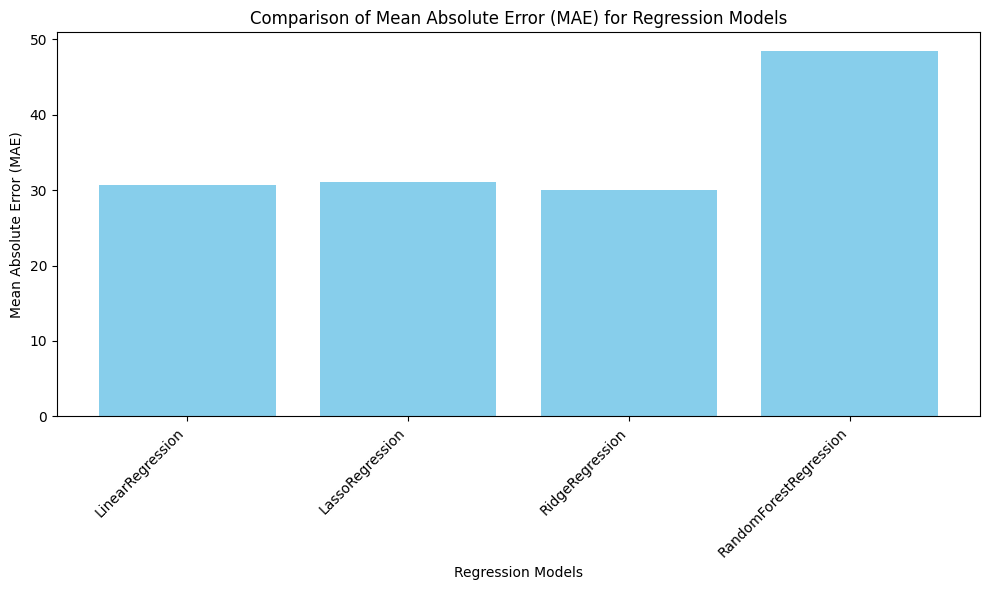

In [4]:
import matplotlib.pyplot as plt

# Given data
model_metrics = {
    'LinearRegression': {'MAE': 30.696147953003415, 'MSE': 1418.0463731514153, 'RMSE': 37.65695650409649, 'R2': 0.8044177618043387, 'MAPE': 0.0534272494734872},
    'LassoRegression': {'MAE': 31.097158483624547, 'MSE': 1435.174617238561, 'RMSE': 37.8836985686266, 'R2': 0.8020553705748609, 'MAPE': 0.05400922277347279},
    'RidgeRegression': {'MAE': 29.954547203155677, 'MSE': 1369.6358918457927, 'RMSE': 37.008592135418944, 'R2': 0.8110947157214669, 'MAPE': 0.05211504272302411},
    'RandomForestRegression': {'MAE': 48.50230869590401, 'MSE': 3945.1817442864776, 'RMSE': 62.81068176899911, 'R2': 0.4558658375033109, 'MAPE': 0.09066043939507978}
}

# Extracting MAE values and model names
model_names = list(model_metrics.keys())
mae_values = [model_metrics[model]['MAE'] for model in model_names]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


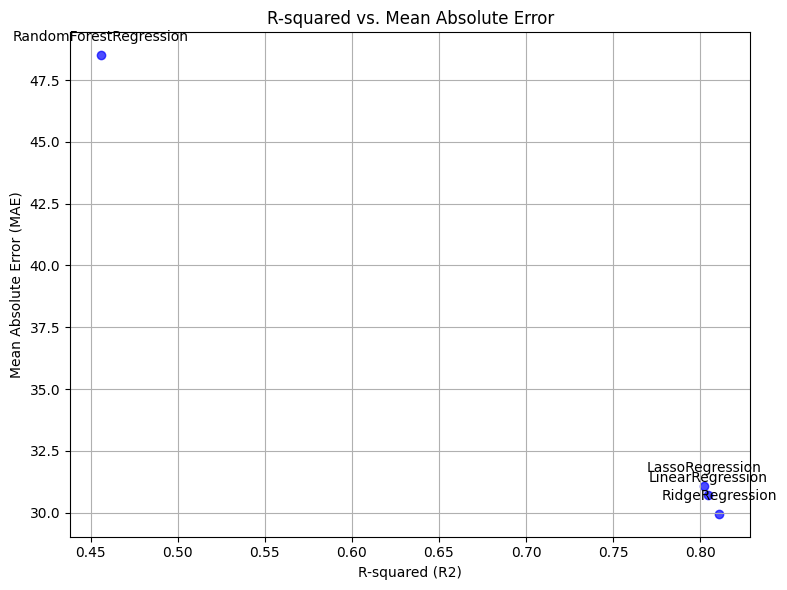

In [5]:
# Given data
model_metrics = {
    'LinearRegression': {'MAE': 30.696147953003415, 'MSE': 1418.0463731514153, 'RMSE': 37.65695650409649, 'R2': 0.8044177618043387, 'MAPE': 0.0534272494734872},
    'LassoRegression': {'MAE': 31.097158483624547, 'MSE': 1435.174617238561, 'RMSE': 37.8836985686266, 'R2': 0.8020553705748609, 'MAPE': 0.05400922277347279},
    'RidgeRegression': {'MAE': 29.954547203155677, 'MSE': 1369.6358918457927, 'RMSE': 37.008592135418944, 'R2': 0.8110947157214669, 'MAPE': 0.05211504272302411},
    'RandomForestRegression': {'MAE': 48.50230869590401, 'MSE': 3945.1817442864776, 'RMSE': 62.81068176899911, 'R2': 0.4558658375033109, 'MAPE': 0.09066043939507978}
}

# Extract R2 and MAE values
r2_values = [model_metrics[model]['R2'] for model in model_names]
mae_values = [model_metrics[model]['MAE'] for model in model_names]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(r2_values, mae_values, c='blue', alpha=0.7)
plt.xlabel('R-squared (R2)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('R-squared vs. Mean Absolute Error')
for i, txt in enumerate(model_names):
    plt.annotate(txt, (r2_values[i], mae_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.tight_layout()
plt.show()


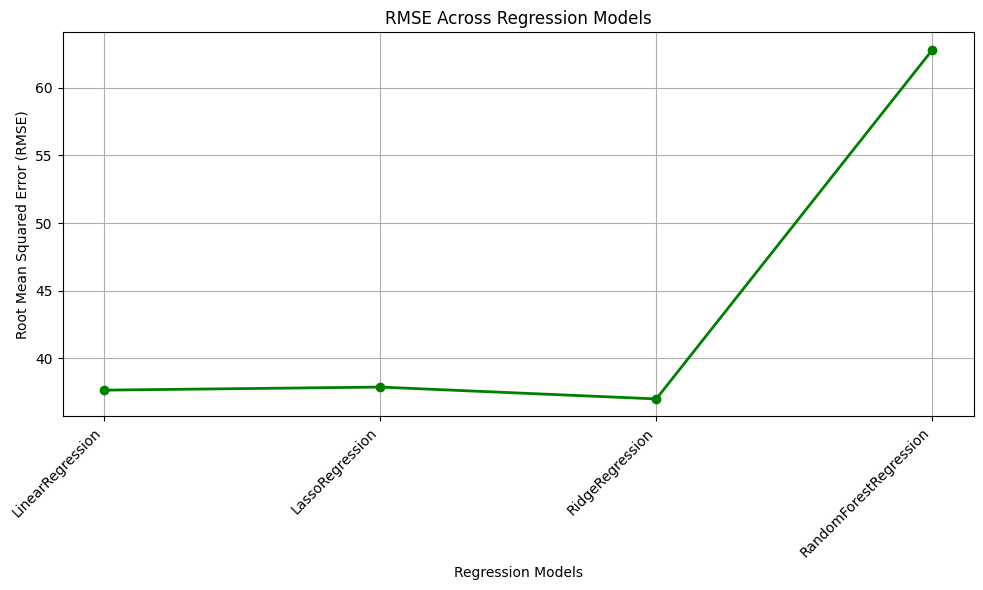

In [6]:
import matplotlib.pyplot as plt

# Given data
model_metrics = {
    'LinearRegression': {'MAE': 30.696147953003415, 'MSE': 1418.0463731514153, 'RMSE': 37.65695650409649, 'R2': 0.8044177618043387, 'MAPE': 0.0534272494734872},
    'LassoRegression': {'MAE': 31.097158483624547, 'MSE': 1435.174617238561, 'RMSE': 37.8836985686266, 'R2': 0.8020553705748609, 'MAPE': 0.05400922277347279},
    'RidgeRegression': {'MAE': 29.954547203155677, 'MSE': 1369.6358918457927, 'RMSE': 37.008592135418944, 'R2': 0.8110947157214669, 'MAPE': 0.05211504272302411},
    'RandomForestRegression': {'MAE': 48.50230869590401, 'MSE': 3945.1817442864776, 'RMSE': 62.81068176899911, 'R2': 0.4558658375033109, 'MAPE': 0.09066043939507978}
}

# Extract RMSE values and model names
model_names = list(model_metrics.keys())
rmse_values = [model_metrics[model]['RMSE'] for model in model_names]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, rmse_values, marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Regression Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Across Regression Models')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


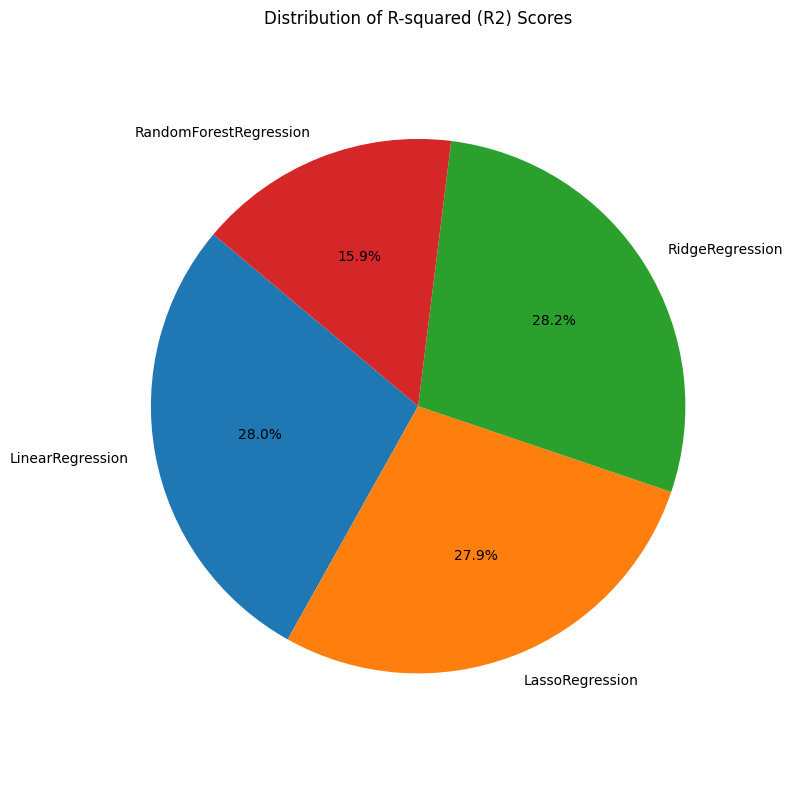

In [7]:
import matplotlib.pyplot as plt

# Given data
model_metrics = {
    'LinearRegression': {'MAE': 30.696147953003415, 'MSE': 1418.0463731514153, 'RMSE': 37.65695650409649, 'R2': 0.8044177618043387, 'MAPE': 0.0534272494734872},
    'LassoRegression': {'MAE': 31.097158483624547, 'MSE': 1435.174617238561, 'RMSE': 37.8836985686266, 'R2': 0.8020553705748609, 'MAPE': 0.05400922277347279},
    'RidgeRegression': {'MAE': 29.954547203155677, 'MSE': 1369.6358918457927, 'RMSE': 37.008592135418944, 'R2': 0.8110947157214669, 'MAPE': 0.05211504272302411},
    'RandomForestRegression': {'MAE': 48.50230869590401, 'MSE': 3945.1817442864776, 'RMSE': 62.81068176899911, 'R2': 0.4558658375033109, 'MAPE': 0.09066043939507978}
}

# Extract R2 values and model names
model_names = list(model_metrics.keys())
r2_values = [model_metrics[model]['R2'] for model in model_names]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(r2_values, labels=model_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of R-squared (R2) Scores')
plt.axis('equal')
plt.tight_layout()
plt.show()


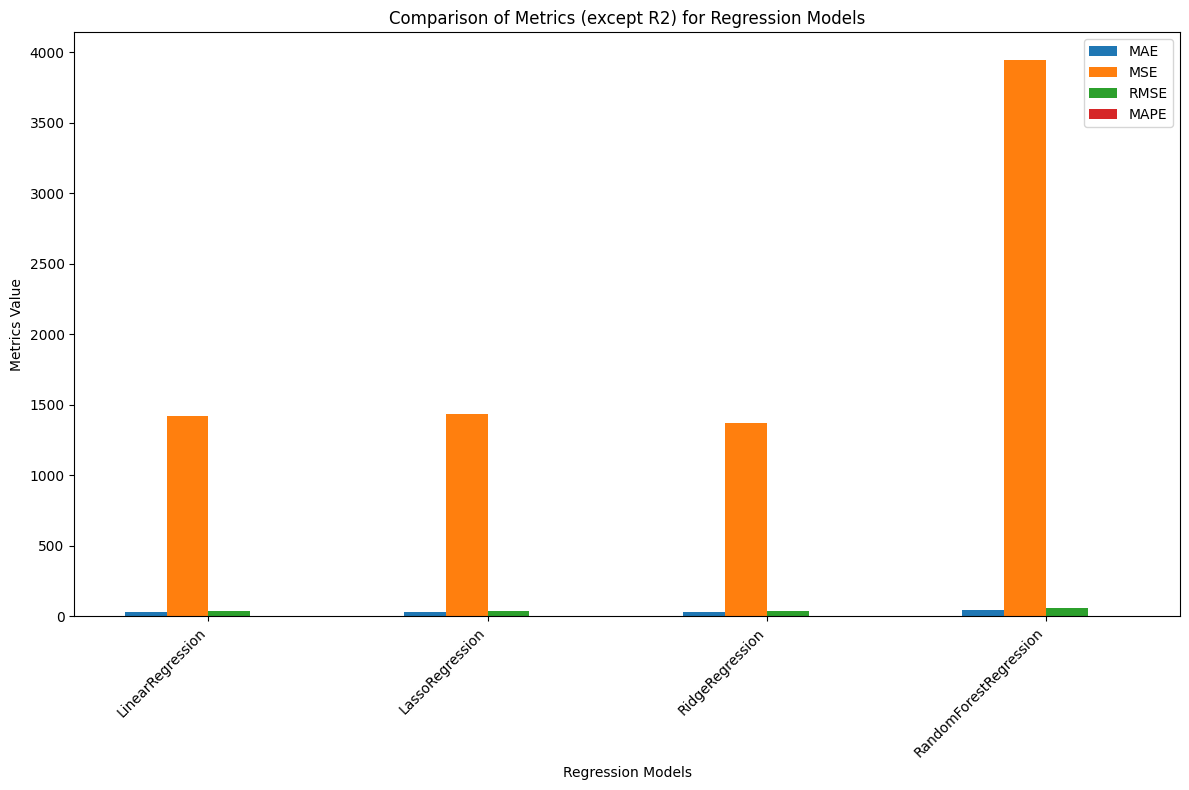

In [8]:

# Extract metrics and model names
model_names = list(model_metrics.keys())
metrics = list(model_metrics[model_names[0]].keys())  # Assuming all models have the same metrics except R2
metrics.remove('R2')  # Remove R2 from the list of metrics
metric_values = np.array([[model_metrics[model][metric] for metric in metrics] for model in model_names])

# Create grouped bar chart for all metrics except R2
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(model_names))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, metric_values[:, i], bar_width, label=metric)

ax.set_xlabel('Regression Models')
ax.set_ylabel('Metrics Value')
ax.set_title('Comparison of Metrics (except R2) for Regression Models')
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


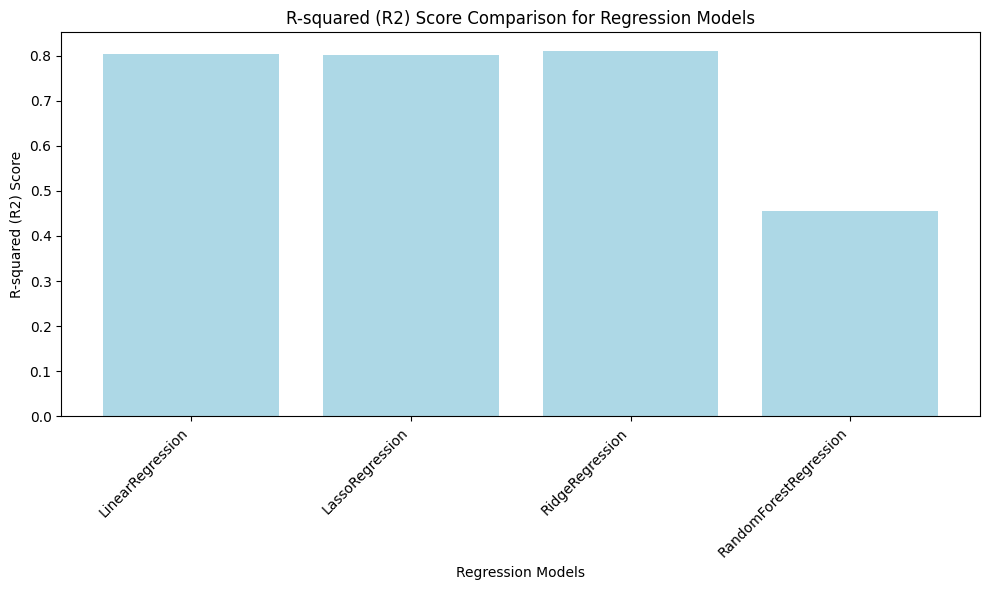

In [9]:
import matplotlib.pyplot as plt

# Given data
model_metrics = {
    'LinearRegression': {'MAE': 30.696147953003415, 'MSE': 1418.0463731514153, 'RMSE': 37.65695650409649, 'R2': 0.8044177618043387, 'MAPE': 0.0534272494734872},
    'LassoRegression': {'MAE': 31.097158483624547, 'MSE': 1435.174617238561, 'RMSE': 37.8836985686266, 'R2': 0.8020553705748609, 'MAPE': 0.05400922277347279},
    'RidgeRegression': {'MAE': 29.954547203155677, 'MSE': 1369.6358918457927, 'RMSE': 37.008592135418944, 'R2': 0.8110947157214669, 'MAPE': 0.05211504272302411},
    'RandomForestRegression': {'MAE': 48.50230869590401, 'MSE': 3945.1817442864776, 'RMSE': 62.81068176899911, 'R2': 0.4558658375033109, 'MAPE': 0.09066043939507978}
}

# Extract R2 values and model names
model_names = list(model_metrics.keys())
r2_values = [model_metrics[model]['R2'] for model in model_names]

# Create bar chart for R2 scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='lightblue')
plt.xlabel('Regression Models')
plt.ylabel('R-squared (R2) Score')
plt.title('R-squared (R2) Score Comparison for Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [4]:
scores = {'LinearRegression': {'MAE': 30.696147953003393,
  'MSE': 1418.0463731514137,
  'RMSE': 37.65695650409647,
  'R2': 0.8044177618043388,
  'MAPE': 0.05342724947348717},
 'LassoRegression': {'MAE': 31.097158483624547,
  'MSE': 1435.1746172385608,
  'RMSE': 37.8836985686266,
  'R2': 0.802055370574861,
  'MAPE': 0.05400922277347277},
 'RidgeRegression': {'MAE': 29.95454720315569,
  'MSE': 1369.6358918457927,
  'RMSE': 37.008592135418944,
  'R2': 0.8110947157214669,
  'MAPE': 0.052115042723024134},
 'RandomForestRegression': {'MAE': 48.50230869590401,
  'MSE': 3945.1817442864776,
  'RMSE': 62.81068176899911,
  'R2': 0.4558658375033109,
  'MAPE': 0.09066043939507978},
  'Catboost': {'MAE': 20.563439518556546,
  'MSE': 814.308367292911,
  'RMSE': 28.53608885767128,
  'R2': 0.771700788589567,
  'MAPE': 0.03572012234}}

In [5]:
import pandas as pd
df = pd.DataFrame(scores).T.reset_index()
df.rename(columns={'index': 'Model'}, inplace=True)
df.set_index('Model', inplace=True)

print(df)

                              MAE          MSE       RMSE        R2      MAPE
Model                                                                        
LinearRegression        30.696148  1418.046373  37.656957  0.804418  0.053427
LassoRegression         31.097158  1435.174617  37.883699  0.802055  0.054009
RidgeRegression         29.954547  1369.635892  37.008592  0.811095  0.052115
RandomForestRegression  48.502309  3945.181744  62.810682  0.455866  0.090660
Catboost                20.563440   814.308367  28.536089  0.771701  0.035720


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scores to DataFrame
df = pd.DataFrame(scores).T.reset_index()
df.rename(columns={'index': 'Model'}, inplace=True)
df.set_index('Model', inplace=True)

# Set colors for visualization
cm = sns.light_palette("green", as_cmap=True)

# Visualize DataFrame as a colored table
styled_df = df.style.background_gradient(cmap=cm)
styled_df
